# CC06 Thermal Physics Practicals

## Determination of Thermoelectric Power by using Thermocouple

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import sympy as smp

x_data: Temperature of hot junction.

y_data: Thermo-emf.

**Experiment 1**

**Experiment 2** (Soumili, Satarupa, Subrata)

In [2]:
x_data = np.array([29,34,38,40.4,45.4,50,55,60,65,70,75])
y_data = np.array([0.965,1.085,1.3,1.4,1.535,1.725,1.93,2.075,2.295,2.505,2.715])

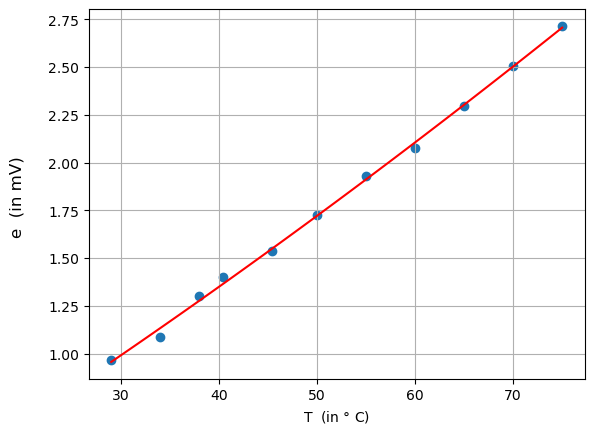

Equation of the curve, 	 e = 3.80003072825459*(0.00412095050590472*T + 1)**2 - 3.80606772062052 

Slope of the tangent at T = 45 is 0.0371274477798666
Slope of the tangent at T = 50 is 0.0377727778549509
Slope of the tangent at T = 36 is 0.0364821177047824


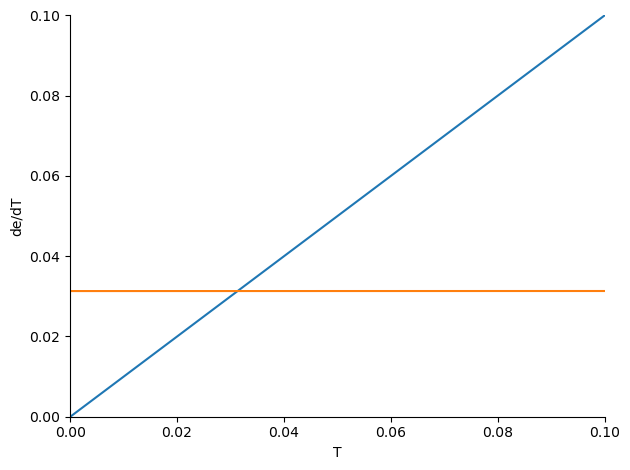

Equation of the curve, 	 de/dT = 0.000129066015016847*T + 0.0313194771041085


In [3]:
def model_f(x, a, b, c):
    return a*(x-b)**2 + c

popt, pcov = curve_fit(model_f, x_data, y_data, p0=[1,0,0.5])
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

plt.scatter(x_data,y_data)
plt.plot(x_model,y_model, color='r')
plt.xlabel('T  (in $\degree$ C)')
plt.ylabel('e  (in mV) \n', fontsize=12)
plt.grid()
plt.show()

x, y = smp.symbols('x y', real=True, positive=True)
y = a_opt*(x-b_opt)**2 + c_opt
print('Equation of the curve, \t e =', y.subs(x,'T'), '\n')

print('Slope of the tangent at T = 45 is', y.diff(x).subs(x,45))
print('Slope of the tangent at T = 50 is', y.diff(x).subs(x,50))
print('Slope of the tangent at T = 36 is', y.diff(x).subs(x,40))

smp.plot(x, y.diff(x), xlim=(0,0.1), ylim=(0,0.1), xlabel='T', ylabel='de/dT')
print('Equation of the curve, \t de/dT =', y.diff(x).subs(x,'T'))

## Lee's and Charlton's Disc Method for determining Thermal Conductivity

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import sympy as smp

x_data: Time (in s).

y_data: Temperature of thermometer.

**Experiment 1**

**Experiment 2**

In [5]:
x_data = np.array([0,24,38,64,97,102,122,127,147,158,170,184,212,225,238,
253,269,289,300,325,340,360,373,392,407,426,447,466,492,507,529,549,568,588])
y_data = np.array([88,87,86,84.5,84.3,84,83.5,83,82.5,82,81.5,81,80.5,80,79.5,
79,78.5,78,77.5,77,76.5,76,75.5,75,74.5,74,73.5,73,72.5,72,71.5,71,70.5,70])
steady_theta = 78  # steadty sate temperature

**Experiment 3** (Rameshwar, Trisha, Soumili)

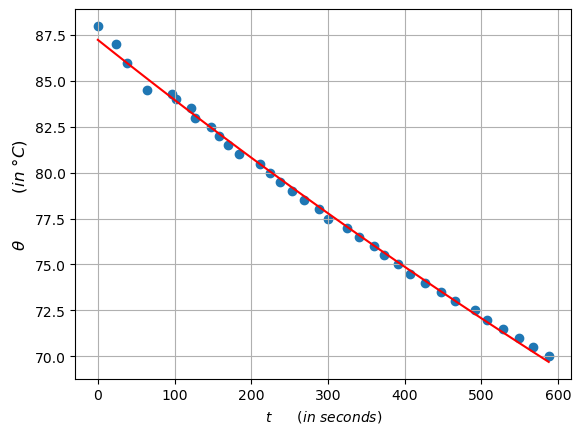

Equation of the curve, 	 theta = 87.2416926381637*exp(-0.000382045667039188*t) 

Slope of the tangent at theta = 78 , is -0.0333288848508190


In [6]:
def model_f(x, a, b):
    return a*np.exp(-b*x)

popt, pcov = curve_fit(model_f, x_data, y_data, p0=[83,0.01])
a_opt, b_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, a_opt, b_opt)

plt.scatter(x_data,y_data)
plt.plot(x_model,y_model, color='r')
plt.xlabel('$t$ \t $(in$ $seconds)$')
plt.ylabel('$\\theta$ \t $(in$ $\degree C)$', fontsize=12)
plt.grid()
plt.show()

x, y = smp.symbols('x y', real=True, positive=True)
y = a_opt * smp.exp(-b_opt*x)
print('Equation of the curve, \t theta =', y.subs(x,'t'), '\n')

print('Slope of the tangent at theta =', steady_theta, ', is',
       y.diff(x).subs(x, smp.log(a_opt/steady_theta)))